<a href="https://colab.research.google.com/github/mario-97/Challenge_DataScientist/blob/modelos/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Challenge Data Scientist - MARIO ULLOA**

> *AUTOR: MARIO ALFREDO ULLOA ORELLANA*

> *FECHA: 14-03-2022*



# Subida y lectura de archivo .CSV

In [115]:
from google.colab import files # libreria para cargar archivos a google colab
import pandas as pd # libreria para generar manipular dataframes
import io # libreria necesaria para manipulacion de archivos
from collections import Counter # libreria necesaria para el conteo de clases de un determinado conjunto de datos

Subir archivo dataset_SCL.csv

In [116]:
uploaded = files.upload(); # cargar modulo para subir archivo
dataset_SCL = pd.read_csv(io.BytesIO(uploaded['dataset_SCL.csv'])) # selección del archivo

Saving dataset_SCL.csv to dataset_SCL (2).csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [117]:
dataset_SCL # imprimir dataframe

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Las dimensiones del DATASET son 68206 filas por 18 columnas. Y los datos representan en cada fila un vuelo que
aterrizó o despegó de Santiago de Chile. Las columnas o caracteristicas, representan lo siguiente:
* Fecha-I : Fecha y hora programada del vuelo.
* Vlo-I : Número de vuelo programado.
* Ori-I : Código de ciudad de origen programado.
* Des-I : Código de ciudad de destino programado.
* Emp-I : Código aerolínea de vuelo programado.
* Fecha-O : Fecha y hora de operación del vuelo.
* Vlo-O : Número de vuelo de operación del vuelo.
* Ori-O : Código de ciudad de origen de operación
* Des-O : Código de ciudad de destino de operación.
* Emp-O : Código aerolínea de vuelo operado.
* DIA : Día del mes de operación del vuelo.
* MES : Número de mes de operación del vuelo.
* AÑO : Año de operación del vuelo.
* DIANOM : Día de la semana de operación del vuelo.
* TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
* OPERA : Nombre de aerolínea que opera.
* SIGLAORI : Nombre ciudad origen.
* SIGLADES : Nombre ciudad destino.

Los tipos de datos son principalmente: Texto, Tiempo y Númericos.

Llama bastante la atención que al ser cada fila un vuelo diferente, estos no tengan un identificador único, a pesar de que ya existe un 'número de vuelo programado', este se repite para N cantidad de vuelos, esto no me parece correcto, debería si o si cada vuelo tener su 'id'. 

Lo otro curioso, es la falta de los datos del clima, un vuelo es posible que se retrase por razones climáticas. Por lo que, también debería estar.



¿Tiene valores nulos el conjunto de datos?
Si, en la columna Vlo-O (Número de vuelo de operación del vuelo). Por lo que desconociendo este dato, toda la fila se elimina

In [118]:
dataset_SCL.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Obtener dimensiones del dataframe

In [119]:
dim = dataset_SCL.shape 
dim # mostrar dimensiones

(68206, 18)

Convertir columnas 'Fecha-O' y 'Fecha-I' en formato fecha. Con el objetivo de manipular correctamente el tratamiento de fechas en bloques de código siguientes.

In [120]:
dataset_SCL['Fecha-O'] = pd.to_datetime(dataset_SCL['Fecha-O'])
dataset_SCL['Fecha-I'] = pd.to_datetime(dataset_SCL['Fecha-I'])


# Cálculo de la temporada alta (y baja)

Primero que todo, hay que asegurar que el conjunto de datos (dataset_SCL) solo contiene vuelos de un solo año. 

In [121]:
año_1 = dataset_SCL['Fecha-I'][0].year
cambio = "Dataset correspondiente a un solo año"
for i in dataset_SCL['Fecha-I']:
  if i.year == año_1:
    continue
  else:
    cambio = "Dataset correspondiente a mas de año"
    break
print(cambio)

Dataset correspondiente a un solo año


Debido a que el dataset es de un solo año, se calcula la temporada alta de la siguiente forma: Se debe separar todos los periodos que correspondan, en este caso: entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, respecto a la columna 'Fecha-I'

In [122]:
from datetime import datetime # libreria 

# año a evaluar.
año = dataset_SCL['Fecha-I'][0].year
# EN CASO DE QUE SE ESTE CONSIDERANDO MAS DE UN AÑO EN EL DATASET, ESTA SECCION DE CODIGO DEBE 
# INGRESARSE DENTRO DEL FOR DE LA CELDA SUBSIGUIENTE (CAMBIANDO EL VALOR [0] POR [i])

# para la fecha 15/12/2017
temp_1_inicio = datetime.strptime('15/12/'+str(año), '%d/%m/%Y')
print(temp_1_inicio)
 
# para la fecha 03/03/2017
temp_1_fin = datetime.strptime('3/3/'+str(año), '%d/%m/%Y')
print(temp_1_fin)

# para la fecha 15/07/2017
temp_2_inicio = datetime.strptime('15/7/'+str(año), '%d/%m/%Y')
print(temp_2_inicio)
 
# para la fecha 31/07/2017
temp_2_fin = datetime.strptime('31/7/'+str(año), '%d/%m/%Y')
print(temp_2_fin)

# para la fecha 11/09/2017
temp_3_inicio = datetime.strptime('11/9/'+str(año), '%d/%m/%Y')
print(temp_3_inicio)
 
# para la fecha 30/09/2017
temp_3_fin = datetime.strptime('30/9/'+str(año), '%d/%m/%Y')
print(temp_3_fin)

2017-12-15 00:00:00
2017-03-03 00:00:00
2017-07-15 00:00:00
2017-07-31 00:00:00
2017-09-11 00:00:00
2017-09-30 00:00:00


Con las temporadas ya obtenidas, simplemente se recorre la columna 'Fecha-I', buscando si la fecha corresponde a una temporada alta o no. Esta informacion se guarda en una lista binaria 'temporada', en donde tenemos: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [123]:
# temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
temporada = []
for i in dataset_SCL['Fecha-I']: 
  if temp_2_inicio < i < temp_2_fin or temp_2_inicio < i < temp_2_fin or temp_1_inicio < i or i < temp_1_fin: 
    temporada.append(1) 
  else:
    temporada.append(0) 

Se convierte la lista 'temporada' a dataframe, y se concatena con el dataframe 'dataset_SCL'

In [124]:
temporada = pd.DataFrame(temporada) # convertir lista a dataframe
dataset_SCL = pd.concat([dataset_SCL, temporada], axis=1) # concatenacion
dataset_SCL = dataset_SCL.rename(columns={0:'temporada_alta'}) # renombrar columna concatenada a 'temporada_alta' (esto debido a que la columna tiene el nombre '0' por defecto)
dataset_SCL # mostrar resultado

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1


# Cálculo de diferencia de fecha en minutos

Obtener diferencia de fechas (Fecha-O menos Fecha-I)

In [125]:
diferencia_min = dataset_SCL['Fecha-O'] - dataset_SCL['Fecha-I']
diferencia_min # mostrar diferencia de fechas en formato fecha

0         0 days 00:03:00
1         0 days 00:09:00
2         0 days 00:09:00
3         0 days 00:03:00
4       -1 days +23:58:00
               ...       
68201     0 days 00:46:00
68202     0 days 00:16:00
68203     0 days 00:40:00
68204     0 days 00:13:00
68205     0 days 00:09:00
Length: 68206, dtype: timedelta64[ns]

Obtener los minutos de estas diferencias de fecha

In [126]:
for i in range(diferencia_min.shape[0]): # se recorre el conjunto de datos generado anteriorermente
  diferencia_min[i] = diferencia_min[i].total_seconds() / 60 # se lee el dato completo, en formato de segundos y se divide en 60 para transformarlo a minutos
diferencia_min # Resultado

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Length: 68206, dtype: object

Concatenar la columna 'diferencia_min' al dataframe 'dataset_SCL'

In [127]:
dataset_SCL = pd.concat([dataset_SCL, diferencia_min], axis=1) # concatenación
dataset_SCL = dataset_SCL.rename(columns={0:'dif_min'}) # renombrar columna concatenada
dataset_SCL # mostrar 

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0


# Cálculo de periodos del día (mañana, tarde y noche)

Para la obtención de los períodos del dia, se recorre la columna de 'Fecha-I', buscando en cada fecha, los intervalos de tiempo (en hora) para determinar si esta corresponde a: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59). Y asignar este periodo a una lista.

In [128]:
periodos = [] # crear lista vacia
for i in range(dim[0]):
  # Hora mayor a 5 y menor que 12
  if dataset_SCL['Fecha-I'][i].hour > 5 and dataset_SCL['Fecha-I'][i].hour < 12: # condicion para el periodo de mañana
    periodos.append('mañana')
  # Hora mayor a 12 y menor que 18
  elif dataset_SCL['Fecha-I'][i].hour > 12 and dataset_SCL['Fecha-I'][i].hour < 18: # condicion para el periodo de tarde
    periodos.append('tarde')
  # Hora mayor que 18 y menor que 5, osea todo el resto de horas restantes.
  else: #dataset_SCL['Fecha-I'][i].hour > 18 and dataset_SCL['Fecha-I'][i].hour < 5: # condicion para el periodo de noche
    periodos.append('noche') 
print("Cantidad de vuelvos correspondientes a cada periodo: ")
print(Counter(periodos)) 

Cantidad de vuelvos correspondientes a cada periodo: 
Counter({'noche': 27436, 'mañana': 22838, 'tarde': 17932})


Con los periodos del dia obtenidos. La lista 'periodo_dia' se convierte en dataframe, y ésta de concatena con el dataframe 'dataset_SCL'

In [129]:
periodo_dia = pd.DataFrame(periodos) # convertir lista en dataframe
dataset_SCL = pd.concat([dataset_SCL, periodo_dia], axis=1) # unir dataframe's
dataset_SCL = dataset_SCL.rename(columns={0:'periodo_dia'}) # renombrar columna del dataframe concatenado
dataset_SCL # mostrar

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,tarde


# Cálculo de atrasos de vuelos de más de 15 minutos

Para calcular los atrasos de mas de 15 minutos, se recorre la columna 'dif_min', buscando aquellos minutos sean mayor a 15. Y asignar esta informacion a una lista binaria ('atraso'), siendo > 15 = 1, caso contrario = 0

In [130]:
atraso = [] # lista
for i in dataset_SCL['dif_min']: # recorrer columna 'dif_min' del dataset
  if i > 15: # condicion minutos mayores a 15
    atraso.append(1) 
  else: # caso contrario
    atraso.append(0)  
print("Cantidad de vuelos con(1) y sin(0) atraso: ")
print(Counter(atraso))

Cantidad de vuelos con(1) y sin(0) atraso: 
Counter({0: 55592, 1: 12614})


Convertir lista de 'atraso' en dataframe para concatenerla con el dataframe 'dataset_SCL'

In [131]:
atraso = pd.DataFrame(atraso) # convertir lista a dataframe
dataset_SCL = pd.concat([dataset_SCL, atraso], axis=1) # concatenacion
dataset_SCL = dataset_SCL.rename(columns={0:'atraso_15'}) # renombrar columna concatenada a 'atraso_15
dataset_SCL # mostrar

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,noche,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,noche,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,noche,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,noche,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,noche,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,tarde,1
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,tarde,1
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,tarde,1
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,tarde,0


# Exportación de columnas nuevas (archivo synthetic_features.csv)

Nuevas columnas: temporada alta, diferencia de minutos, atraso de 15 minutos, periodos del dia

In [132]:
dataset_SCL['dif_min'] = dataset_SCL['dif_min'].astype('int64') # convertir columna 'dif_min' a numero entero
synthetic_features = dataset_SCL[['temporada_alta','dif_min',	'atraso_15', 'periodo_dia']] # Filtrado de columnas del dataset_SCL para ser asignado a la variable synthetic_features
synthetic_features.to_csv('synthetic_features.csv') # creacion del archivo .CSV
files.download('synthetic_features.csv') # descargar del archivo .CSV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
synthetic_features # mostrar

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3,0,noche
1,1,9,0,noche
2,1,9,0,noche
3,1,3,0,noche
4,1,-2,0,noche
...,...,...,...,...
68201,1,46,1,tarde
68202,1,16,1,tarde
68203,1,40,1,tarde
68204,1,13,0,tarde


# Tasa de atraso de los vuelos

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

La otra variable que puede influir directamente es el período del dia en que se realiza el vuelo

In [134]:
tasas_atraso = dataset_SCL[['SIGLADES', 'OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO', 'periodo_dia', 'atraso_15']]

¿Por qué se utiliza la función de promedio para obtener la tasa? En este caso, y solo en este caso, según el formato binario utilizado por la columna 'atraso_15', resulta en una igualdad en la siguiente operación:

* tasa = cantidad de vuelos con atraso/(cantidad de vuelos con atraso + cantidad de vuelos sin atraso)

* promedio = sumatoria de los valores de la columna 'atraso_15'/cantidad total de vuelos

Expresado con un ejemplo resulta:

* tasa = [1+1+1+1+1+1+1+...+n]/([1+1+...+n]+[1+1+...+m])
* promedio = [1+0+0+0+1+0+1+0+...+n]/([1+1+...+n]+[1+1+...+m])

Por lo que, el dividendo, es el mismo valor: [1+1+1+1+1+1+1+...+n] = [1+0++0+1+0+1+0+...+n], al igual que el dividendo.

In [135]:
# Funcionamiento: Se agrupan los datos de 'siglades' (o bien, 'OPERA', 'MES', etc) y se calcula el porcentaje de atraso respecto al total de vuelos, multiplcado por 100, para obtener los datos en porcentaje.
tasa = tasas_atraso.columns.values[0: (len(tasas_atraso.columns.values)-1)]
lista_tasas = []
for i in tasa:
  print("-------------TASA DE ATRASO POR "+i+"-------------") 
  tasa_i = (tasas_atraso.groupby([i]).mean()*100)['atraso_15']
  lista_tasas.append(tasa_i)
  print(tasa_i) 

# Ejemplo: Antofagasta tiene un 14.6% de atrasos (respecto al total de vuelos registrados) de mas de 15 min. Es decir, de 100 vuelos, mas de 14 llegan con atraso
# Ejemplo 2: los dias domingos tienen un 16.1% de atrasos (respecto al total de vuelos registrados) de mas de 15 min. Es decir, de 100 vuelos, mas de 16 llegan con atraso

-------------TASA DE ATRASO POR SIGLADES-------------
SIGLADES
Antofagasta      14.638783
Arica            13.546798
Asuncion         28.448276
Atlanta           5.865922
Auckland N.Z.    37.396122
                   ...    
Toronto          31.448763
Tucuman          26.315789
Ushuia           66.666667
Valdivia         15.537849
Washington        0.000000
Name: atraso_15, Length: 62, dtype: float64
-------------TASA DE ATRASO POR OPERA-------------
OPERA
Aerolineas Argentinas       24.012314
Aeromexico                   2.849003
Air Canada                  45.663717
Air France                   8.379888
Alitalia                    11.196911
American Airlines            6.737120
Austral                     20.270270
Avianca                     26.562500
British Airways             14.146341
Copa Air                     6.270270
Delta Air                    5.865922
Gol Trans                   35.607940
Grupo LATAM                 17.866575
Iberia                       9.944751
JetSmar

¿A qué vuelos corresponden la mayor tasa de atrasos?

-----------Varibles con mayor cantidad de atraso-------------
SIGLADES
['Cochabamba', 'Puerto Stanley', 'Quito']: 100.0
OPERA
['Plus Ultra Lineas Aereas']: 61.224489795918366
MES
[7]: 29.339118825100137
DIANOM
['Viernes']: 22.201710066070735
temporada_alta
[1]: 20.26431718061674
TIPOVUELO
['I']: 22.56081946222791
periodo_dia
['tarde']: 20.131608298014722


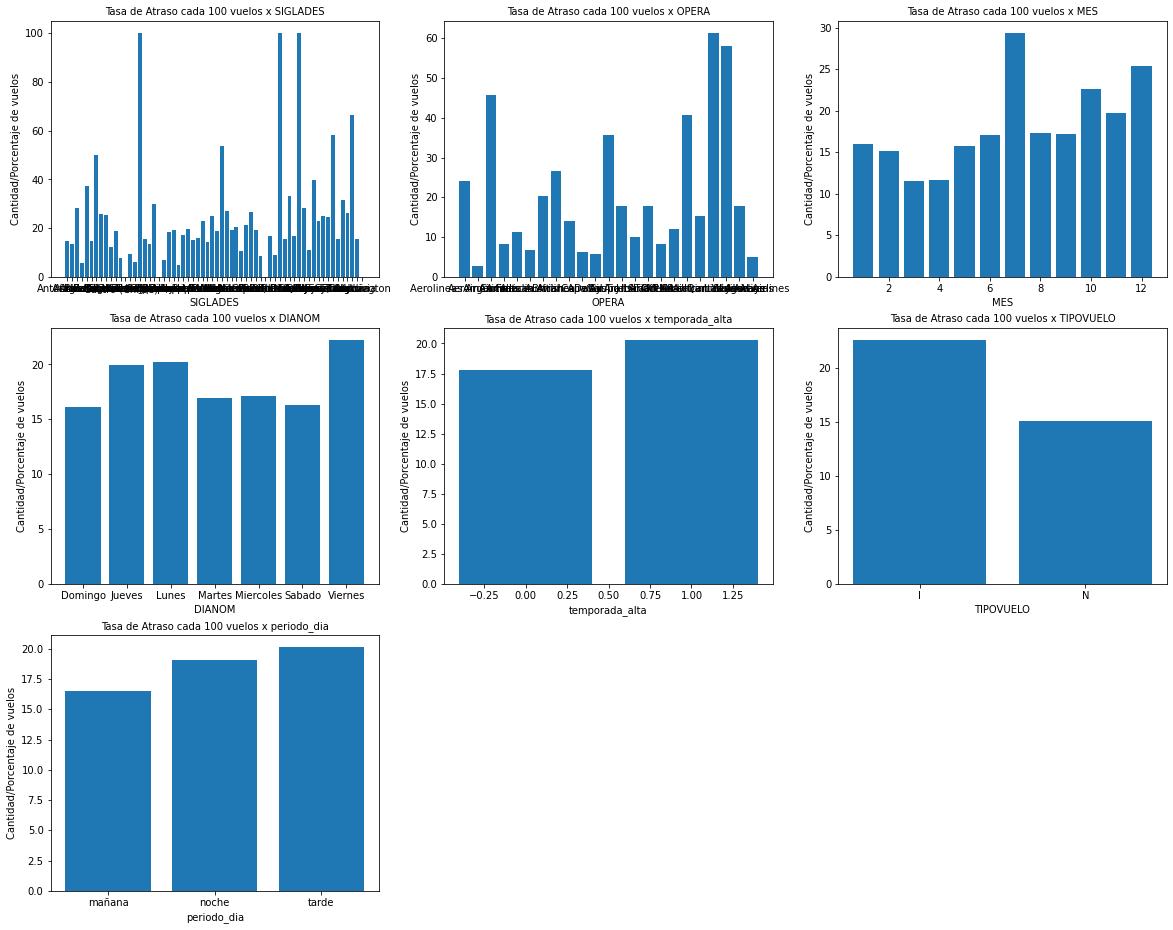

In [136]:
import matplotlib.pyplot as plt
e = 0
plt.figure(figsize=(20,16))
j = 1
print("-----------Varibles con mayor cantidad de atraso-------------")
for i in lista_tasas:
  print(tasa[e]) # imprimir nombre de columna
  value_max = i.max() # buscar valor maximo
  maximo = pd.DataFrame(i).index[pd.DataFrame(i)['atraso_15'] == value_max].tolist() # buscar indice al cual corresponde este valor maximo
  print(str(maximo) + ": " +str(value_max))
  
  plt.subplot(3,3,j) 
  ## Legenda en el eje y
  plt.ylabel('Cantidad/Porcentaje de vuelos',fontsize=10)
  
  ## Legenda en el eje x
  plt.xlabel(tasa[e],fontsize=10)
  
  ## Título de Gráfica
  plt.title(("Tasa de Atraso cada 100 vuelos x "+str(tasa[e])),fontsize=10)
  plt.rc('xtick', labelsize=10)
  plt.rc('ytick', labelsize=10)

  plt.bar(i.keys(), i) 
  
  j = j + 1
  e = e + 1

* Respecto a la ciudad de destino, muestra que 'Cochabamba', 'Puerto Stanley' y 'Quito', de cada 100 vuelos, los 100 tienen atraso. 
* Respecto a la aereolínea a cargo, se indica que 'Plus Ultra Lineas Areas', tiene mas de 61 vuelos atrasados (de 100).
* En cuanto a los meses, el mes con mayor cantidad de atrasos es el mes de julio, con un 29.3% de atrasos. Esto se de debe, ¿al clima? Probablemente, solo se podría inferir, y no asegurar, ya que, no se tienen esos datos. 
* El día de la semana con mayor cantidad de atrasos es el día viernes, con un 22,2% 
* La temporada con mayor cantidad de vuelos con atrasos, es la temporada alta con un 20,2%, debido a que estos períodos corresponden, generalmente, al periodo de vacaciones de los clientes, por lo que se debe aumentar el flujo de viajes. 
* El tipo de vuelo con mayor tasa de atrasos, son los vuelos internacionales con un 22,5%
* Respecto al período del día con mayores atrasos, es en el período con vuelos durante la tarde, con un 20,13%, y con una diferencia del 1% con el período de noche (19%), lo que quiere decir, que vuelos con menos luminosidad tardan un poco mas que aquellos que se realizan durante el día.

# Pre-procesamiento de datos

In [137]:
!pip install boruta # instalación de librería boruta

Ajuste de datos para ser ingresados al modelo

Pasos a realizar:


1.   Eliminar filas con valores nulos
2.   Separar columnas de entrada(X) y columna de salida (y)
3.   Eliminar columnas 'Fecha-I' y 'Fecha-O' 
4.   **Aplicar Label Enconder**
5.   **Aplicar Selección de Atributos**
6.   **Aplicar SMOTE (balance de clases)**
6.   **Entrenar modelos SVM, KNN**
7.   **Aplicar predicción a los datos para testear** 



La columna 'atraso_15' es considerada la clase de salida. Ya que, lo que se busca es la probabilidad de atraso de los vuelos, y esta columna es la que me entrega la información necesaria

In [138]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# Eliminar filas con valores nulos
for i in dataset_SCL.columns.values: # se lee cada columna, en donde se encuentre un valor nulo, elimina toda la fila
  dataset_SCL = dataset_SCL.dropna(subset=[i]) 
# --------------------------------

y = dataset_SCL['atraso_15'] # conjunto de clase de salida
X = dataset_SCL.drop(['atraso_15'], axis=1) # conjunto de datos de entrada

# Las columnas con formato fecha son eliminadas del conjunto de datos, debido a tienen un formato incompatible con los modelos de preprocesamiento y modelos de predicción, 
# y sus datos ya se encuentran registrados en las columnas dia, mes, y año.
X = X.drop(['Fecha-I'], axis=1)
X = X.drop(['Fecha-O'], axis=1) 

class_names = X.columns.values # nombre de las columnas

Conversión de datos de tipo 'object' a 'string', con el fin de aplicar un labelencoder en cada columna.
Pero, ¿qué es Label Enconder? Esta funcion permite convertir las columnas del tipo string en númericas, **sin perder** la relación de los datos, es decir mantienen su estructura, sólo se le asigna un código a cada string.

In [139]:
for i in class_names: # se recorren los nombres de las columnas
  tipo = X[i].dtype # se busca la columna en el dataframe y se consulta por el tipo de dato
  if tipo == "object": # ¿la columna tiene datos de tipo object?
    X[i] = X[i].astype('string') # CONVERTIR TIPOS DE DATOS 'OBJECT' A 'STRING'
X # mostrar

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
0,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3,noche
1,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9,noche
2,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9,noche
3,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3,noche
4,226,SCEL,KMIA,AAL,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46,tarde
68202,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16,tarde
68203,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40,tarde
68204,400,SCEL,SPJC,JAT,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13,tarde


## Label Encoder

Ejecución de label encoder, para posteriormente aplicar una selección de atributos

In [140]:
from sklearn import preprocessing 

# correcion dataframe.
# Esta fila se ingresa debido a que el labelenconder no considera la ultima fila del conjunto de datos, por lo que se agrega, pero posteriormente se elimina. Y NO afecta la data
X=X.append({'Vlo-I' : '9999' ,'Ori-I' : '9999' ,'Des-I' : '9999' ,'Emp-I' : '9999' ,'Vlo-O' : '9999' ,'Ori-O	' : '9999' ,'Des-O' : '9999' ,'Emp-O' : '9999' ,'DIA' : '9999' ,'MES' : '9999' ,'AÑO' : '9999' ,'DIANOM' : '9999' ,'TIPOVUELO' : '9999' ,'OPERA' : '9999' ,'SIGLAORI' : '9999' ,'SIGLADES' : '9999' ,'temporada_alta' : '9999' ,'dif_min' : '9999', 'periodo_dia':'9999' } , ignore_index=True)
#---------------------
for i in class_names: # encodear todas las columnas 
  if ( i != 'DIA' and i != 'MES' and i != 'AÑO' and i != 'temporada_alta' and i != 'dif_min'): # Este Label Encoder solo aplica a aquellas columnas no numéricas
    X = X.dropna(subset=[i]) # eliminar fila con valores nulos
    le = preprocessing.LabelEncoder() # cargar labelencoder
    encoder = le.fit_transform(X[i]) # Ajuste de etiquetas y transformar etiquetas 
    columna = pd.DataFrame(encoder) # conversion de lista a dataframe
    X[i] = columna # reemplazar nueva columna con valores numericos
     
# borrar columna residual
X = X.drop(['Ori-O\t'], axis=1)
#-------------------------

# Eliminar filas con valores nulos (especificamente la fila ingresada al comienzo de este bloque)
for i in class_names: # se lee cada columna, en donde se encuentre un valor nulo, elimina toda la fila
  X = X.dropna(subset=[i]) 
# --------------------------------

X

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,periodo_dia
0,219,1,10,1,318,0,10,2,1,1,2017,0,0,5,0,34,1,3,1
1,219,1,10,1,318,0,10,2,2,1,2017,2,0,5,0,34,1,9,1
2,219,1,10,1,318,0,10,2,3,1,2017,3,0,5,0,34,1,9,1
3,219,1,10,1,318,0,10,2,4,1,2017,4,0,5,0,34,1,3,1
4,219,1,10,1,318,0,10,2,5,1,2017,1,0,5,0,34,1,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,340,1,59,15,515,0,57,16,22,12,2017,6,0,14,0,28,1,46,2
68201,340,1,59,15,515,0,57,16,25,12,2017,2,0,14,0,28,1,16,2
68202,340,1,59,15,515,0,57,16,27,12,2017,4,0,14,0,28,1,40,2
68203,340,1,59,15,515,0,57,16,29,12,2017,6,0,14,0,28,1,13,2


Nueva conversión, de columnas 'string' a 'int64', con el fin de ajustarse al formato de la selección de atributos.


In [141]:
for i in class_names:
  X[i] = X[i].astype('int64') # CONVERTIR TIPOS DE DATOS 'string' A 'int64'

## Selección de atributos


¿Para qué aplicar selección de atributos? Para reducir la data, y de esta forma eliminar infomarción innecesaria o redundante para el entrenamiento de los modelos. Y al mismo tiempo, ayuda a reducir el uso de memoria y tiempo de ejecución.

Selección de atributos con el algoritmo Boruta. Este algoritmo surge de las bases del método de Random Forest: se lidia con los problemas agregando más aleatoriedad al sistema. 

Funcionamiento: se realiza una copia aleatoria del sistema, se fusiona la copia con el original y se construye el clasificador para este sistema extendido. Para evaluar la importancia de la variable en el sistema original, se compara con la de las variables aleatorias. Solo se consideran importantes las variables cuya importancia es superior a la de las aleatorias.

Otro algoritmo conocido es el Recursive Feature Elimination, el cual es un proceso recursivo que clasiﬁca las características según alguna medida de su importancia. En cada iteración se miden importancias de características y el menos relevante se elimina. Este último no se utilizó para disminuir la capacidad de cómputo del sistema, y además el algoritmo de boruta es mas manipulable en el sentido de que permite determinar si se quieren capturar mas o menos caracteristicas del conjunto de datos, en ese sentido, la variable 'perc', mientras menor valor tenga, mas atributos se seleccionarán

In [142]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy 

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=4) # inicializar Boruta
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 100, perc = 100)
boruta_feature_selector.fit_transform(X.values, y.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	0
Rejected: 	4


array([[219,  10,   1, ...,   1,   3,   1],
       [219,  10,   1, ...,   1,   9,   1],
       [219,  10,   1, ...,   1,   9,   1],
       ...,
       [340,  59,  15, ...,   1,  40,   2],
       [340,  59,  15, ...,   1,  13,   2],
       [340,  59,  15, ...,   1,   9,   2]])

Obtención de las columnas seleccionadas

In [143]:
X_filtered = boruta_feature_selector 
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for i in np.nditer(indexes): # se recorre el selector de caracteristicas de boruta
    final_features.append(class_names[i]) # se añaden los nombres de las columnas a una lista
print(final_features)

['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'dif_min', 'periodo_dia']


Se genera un nuevo dataframe solo con aquellas columnas obtenidas por la selección de atributos

In [144]:
dataset_withFS = X[final_features] # seleccionar
dataset_withFS # mostrar

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,periodo_dia
0,219,10,1,318,10,2,1,1,0,0,5,34,1,3,1
1,219,10,1,318,10,2,2,1,2,0,5,34,1,9,1
2,219,10,1,318,10,2,3,1,3,0,5,34,1,9,1
3,219,10,1,318,10,2,4,1,4,0,5,34,1,3,1
4,219,10,1,318,10,2,5,1,1,0,5,34,1,-2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,340,59,15,515,57,16,22,12,6,0,14,28,1,46,2
68201,340,59,15,515,57,16,25,12,2,0,14,28,1,16,2
68202,340,59,15,515,57,16,27,12,4,0,14,28,1,40,2
68203,340,59,15,515,57,16,29,12,6,0,14,28,1,13,2


Dividir dataset en conjunto de entrenamiento y testeo

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(dataset_withFS, y, test_size=0.25,  random_state = 0) # división del 75% para entrenamiento, y 25% para testeo


## Balance de clases

Aplicar SMOTE para el balanceo de clases, para ajustar la cantidad de clases mas baja a la mas alta, y de esta manera maximizar el desempeño final

In [146]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
print(Counter(y_train)) # Se observa si existe un desbalanceo de clases

Counter({0: 41727, 1: 9426})


In [147]:
X_train, y_train = oversample.fit_resample(X_train, y_train) # se aplica smote
counter = Counter(y_train)
print("Clases balanceadas: ")
print(counter)

Clases balanceadas: 
Counter({0: 41727, 1: 41727})


# Modelos

Métricas a considerar para los modelos:
* Verdaderos positivos
* Falso positivos
* Falsos negativos
* Verdaderos negativos

Las cuales se obtienen mediante la matriz de confusión. ¿Por qué elegir estas métricas?, porque su objetivo es calcular las siguiente:
* Accuracy: Exactitud del modelo
* Sensibilidad: Equivalente a la tasa de positivos verdaderos. Es decir, la proporción de casos positivos que están bien detectadas por la prueba.
* Especificidad: Tasa de verdaderos negativos Es decir, proporción de casos negativos que son bien detectadas por la prueba. 
* Valor predictivo negativo (VPN): Proporción de casos verdaderamente negativos entre los casos negativos detectados por la prueba
* Valor Predictivo Positivo (VPP): Proporción de casos verdaderamente positivos entre los casos positivos detectados por la prueba

Las cuales permitirán discriminar y evaluar si el modelo esta correctamente entrenado y que es capaz de realizar óptimas predicciones.

Además se utiliza el área bajo la curva roc (AUC), el cual varia entre valores 0.0 y 1.0 para determinar si se está frente a un modelo de diagnostico perfecto (1), uno que no es capaz de diferenciar clases positivas o negativas (0.5), o bien un modelo de clasificaciones erronéas (0.0)
 






## **Aplicación de modelo SVM** (*Support vector machine*: Máquina de soporte vectorial)

¿Por qué este modelo? Debido a su uso eficiente en memoria, me permite expresar las predicciones con probabilidades y es posible ajustar el modelo a una predicción binaria.

In [148]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0, probability = False)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [149]:
import math
from sklearn.metrics import confusion_matrix
def metricas_perfomance(tn,fp,fn,tp):
  VP = tp
  FP = fp
  FN = fn
  VN = tn
  N = VP + FP + FN + VN
  accuracy = (VP + VN) / N
  sensibilidad = VP / (VP + FN) #  (equivalente a la tasa de positivos verdaderos): Proporción de casos positivos que están bien detectadas por la prueba.
  especificidad = VN / (VN + FP) # (también llamada Tasa de verdaderos negativos): proporción de casos negativos que son bien detectadas por la prueba. 
  VPN = VN / (VN + FN) # Valor predictivo negativo (VPN): Proporción de casos verdaderamente negativos entre los casos negativos detectados por la prueba
  VPP = VP / (VP + FP) # Valor Predictivo Positivo (VPP): Proporción de casos verdaderamente positivos entre los casos positivos detectados por la prueba 
  return [accuracy, sensibilidad, especificidad, VPN, VPP]

In [150]:
y_pred = clf.predict(X_test) 
print("---------------Exactitud del modelo para entrenamiento y testeo---------------")
print("Training Accuracy: ",clf.score(X_train, y_train)*100,"%")
print("Testing Accuracy: ", clf.score(X_test, y_test)*100,"%")
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel() 
print("---------------Desempeño del testeo con SVM---------------")
performance = metricas_perfomance(tn,fp,fn,tp) 
print("Sensibilidad: "+str(performance[1]*100)+" %")
print("Especificidad: "+str(performance[2]*100)+" %")
print("VPN: "+str(performance[3]*100)+" %")
print("VPP: "+str(performance[4]*100)+" %")

---------------Exactitud del modelo para entrenamiento y testeo---------------
Training Accuracy:  100.0 %
Testing Accuracy:  100.0 %
---------------Desempeño del testeo con SVM---------------
Sensibilidad: 100.0 %
Especificidad: 100.0 %
VPN: 100.0 %
VPP: 100.0 %


El modelo SVM, obtuvo una predicción perfecta, 100% de exactitud, sensibilidad y especificidad. Por lo que, las predicciones serán confiables y acertadas, tanto para diferenciar clases negativas y positivas


Text(0.5, 51.0, 'Predicted label')

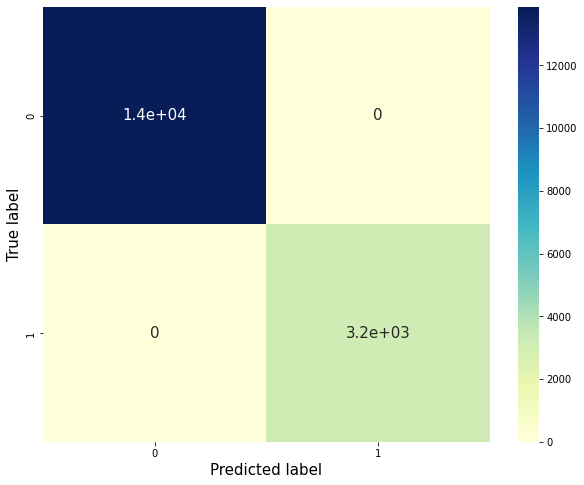

In [151]:
import seaborn as sns
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", annot_kws={'size': 15}) 
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label',fontsize=15)

El comportamiento que obtuvo la matriz de confusión demuestra una clasificación correcta de todos los vuelos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x576 with 0 Axes>

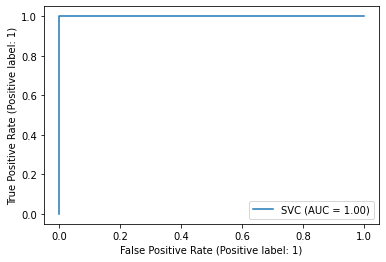

In [152]:
# Curva roc
from sklearn import datasets, metrics, model_selection, svm
plt.figure(figsize=(10,8))
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

El AUC, demuestra igualmente una predicción perfecta, situando su valor en 1.0

Considerando todos los vuelos registrados en X_test, ¿Cuan probable es que se atrasen? Para efectos de simplicar los resultados, solo se muestran los vuelos numero 13000 hasta 13050

In [153]:
# Indique el tramo:
desde = 13000
hasta = desde+50

In [154]:
predicciones_SVM = []
for i in range(desde, X_test.shape[0]):
  vuelo_i = pd.DataFrame(X_test.iloc[i]).transpose()
  resultado = clf.decision_function(vuelo_i) 
  print("El vuelo número "+ str(i) + ", ¿Cuan probable es que se atrase?: "+str(resultado[0])+" %")

  predicciones_SVM.append(resultado[0])

  if i >= hasta:
    break

El vuelo número 13000, ¿Cuan probable es que se atrase?: 101.00109338660657 %
El vuelo número 13001, ¿Cuan probable es que se atrase?: 89.00068520104611 %
El vuelo número 13002, ¿Cuan probable es que se atrase?: -25.00022512770089 %
El vuelo número 13003, ¿Cuan probable es que se atrase?: -33.00030115849211 %
El vuelo número 13004, ¿Cuan probable es que se atrase?: -45.000124824064706 %
El vuelo número 13005, ¿Cuan probable es que se atrase?: 105.00135480448527 %
El vuelo número 13006, ¿Cuan probable es que se atrase?: -21.000222411359935 %
El vuelo número 13007, ¿Cuan probable es que se atrase?: 30.99990141958519 %
El vuelo número 13008, ¿Cuan probable es que se atrase?: -33.000061442292804 %
El vuelo número 13009, ¿Cuan probable es que se atrase?: 19.00026934196524 %
El vuelo número 13010, ¿Cuan probable es que se atrase?: -33.000449483196135 %
El vuelo número 13011, ¿Cuan probable es que se atrase?: -21.000131224253657 %
El vuelo número 13012, ¿Cuan probable es que se atrase?: -4.99

## **Aplicación del modelo KNN** (*K-nearest neighbors*: K-vecinos mas cercanos)

¿Por qué este modelo? Porque me permite realizar predicciones para probabilidades y tiene facilidad de ajuste de parámetros

In [155]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [156]:
import sklearn
y_pred = clf.predict(X_test) 
print("---------------Exactitud del modelo para entrenamiento y testeo---------------")
print("Training Accuracy: ",clf.score(X_train, y_train)*100," %")
print("Testing Accuracy: ", clf.score(X_test, y_test)*100," %")
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()  
print("---------------Desempeño del testeo con KNN---------------")
performance = metricas_perfomance(tn,fp,fn,tp) 
print("Sensibilidad: "+str(performance[1]*100)+" %")
print("Especificidad: "+str(performance[2]*100)+" %")
print("VPN: "+str(performance[3]*100)+" %")
print("VPP: "+str(performance[4]*100)+" %")

---------------Exactitud del modelo para entrenamiento y testeo---------------
Training Accuracy:  99.00783665252713  %
Testing Accuracy:  97.17921651419188  %
---------------Desempeño del testeo con KNN---------------
Sensibilidad: 97.71016311166876 %
Especificidad: 97.05712637045586 %
VPN: 99.4604183605588 %
VPP: 88.41896111268805 %


El desempeño de este modelo indica una leve desventaja para discernir clases positivas y negativas respecto al SVM, con porcentajes de 97,7% y 97,0%. Sin embargo son porcentajes notablemente aceptables, convirtiendolo en un modelo óptimo para la predicción de los datos. Sin embargo los VPP causa incertidumbre, debido a que solo tiene un 88.4%, quiere decir que no todos los casos positivos fueron clasificados correctamente.

Text(0.5, 51.0, 'Predicted label')

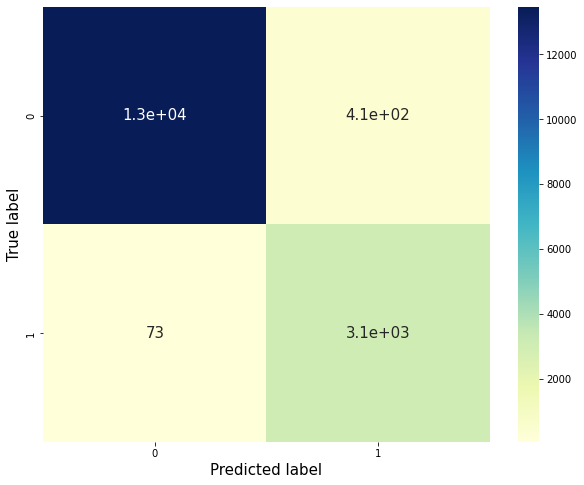

In [157]:
import seaborn as sns
df_cm = pd.DataFrame(cm, 
                     index = [i for i in range(0,2)], columns = [i for i in range(0,2)])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", annot_kws={'size': 15})  
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15) 

Respecto a la matriz de confusión, ésta clasificó erronamente 409 vuelos de forma incorrecta, asumiendo que tenían retraso cuando realmente no lo tenían. Y 73 vuelos clasificados como atrasados, siendo que estos eran vuelos no atrasados.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x576 with 0 Axes>

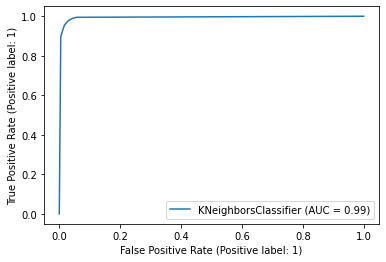

In [158]:
plt.figure(figsize=(10,8))
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

En este caso, el AUC, tiene un valor de 0.99. Es decir, una predicción prácticamente perfecta.

In [159]:
predicciones_KNN = []
for i in range(desde, X_test.shape[0]):
  vuelo_i = pd.DataFrame(X_test.iloc[i]).transpose()
  resultado = clf.predict_proba(vuelo_i) 
  print("El vuelo número "+ str(i) + ", ¿Cuan probable es que se atrase?: "+str((resultado[0][1]*100))+" %")#+". Por lo que su probabilidad de NO atraso es: "+str(resultado[0][0]))
  
  predicciones_KNN.append((resultado[0][1]*100))

  if i >= hasta:
    break
 

El vuelo número 13000, ¿Cuan probable es que se atrase?: 100.0 %
El vuelo número 13001, ¿Cuan probable es que se atrase?: 100.0 %
El vuelo número 13002, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13003, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13004, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13005, ¿Cuan probable es que se atrase?: 100.0 %
El vuelo número 13006, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13007, ¿Cuan probable es que se atrase?: 100.0 %
El vuelo número 13008, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13009, ¿Cuan probable es que se atrase?: 100.0 %
El vuelo número 13010, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13011, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13012, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13013, ¿Cuan probable es que se atrase?: 100.0 %
El vuelo número 13014, ¿Cuan probable es que se atrase?: 0.0 %
El vuelo número 13015, ¿Cuan probable es qu

Para demostrar una mejor confianza de los resultados, ¿que pasa si comparamos las predicciones mediante una tabla del SVM, KNN y los datos reales? Veamos:


In [160]:
comparacion = pd.DataFrame()
comparacion['atraso_15'] = y_test.iloc[desde: (hasta+1)].to_list()
comparacion['SVM'] = predicciones_SVM
comparacion['KNN'] = predicciones_KNN
comparacion

,atraso_15,SVM,KNN
0,1,101.001093,100.0
1,1,89.000685,100.0
2,0,-25.000225,0.0
3,0,-33.000301,0.0
4,0,-45.000125,0.0
5,1,105.001355,100.0
6,0,-21.000222,0.0
7,1,30.999901,100.0
8,0,-33.000061,0.0
9,1,19.000269,100.0


Si bien el porcentaje de probabilidad de los modelos SVM y KNN no coinciden, si aciertan en que si es probable que exista atraso en un determinado vuelo, tal cual a como se indica en los vuelos del dataset. Sin embargo, el modelo SVM, es mas preciso, evidenciando cuán probable es que exista atraso.



 ¿Qué variables son las que más influyen en la predicción? Las variables que mas influyen en la predicción son las consideradas por la selección de atributos, es decir: 'Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'dif_min', 'periodo_dia', las cuales varian según cada vuelo.

Por lo que, aquellas variables que menos influyen son:  Ori-I, Fecha-O, Fecha-I, Ori-O, AÑO, SIGLAORI. La similitud de estas variables es que todos (excepto 'Fecha-O', 'Fecha-I') los datos de estas columnas es el mismo valor, por lo que no muestran diferencias entre los vuelos. En cuanto, a las variables de 'Fecha-O', 'Fecha-I', si bien los valores solo difieren en la hora, éstas están representadas por períodos del día en otra variable (mañana, tarde, noche), y respecto al formato de dia, mes, año, éstas también estan expresadas en otras variables ('DIA', 'MES', 'AÑO', respectivamente). Por lo cual, para evitar redundancias no son consideradas (solo fueron utilizadas para calcular los datos de 'temporada_alta', 'dif_min', 'periodo_dia', y 'atraso_15').

Por otro lado, la performance del modelo SVM ya no es posible mejorarla debido a que ya alcanzó el 100% en todas las métricas. Respecto al KNN, este es posible mejorar un poco su desempeño modificando la variable K, y resulta lo siguiente:

---------------Exactitud del modelo para entrenamiento y testeo---------------
Training Accuracy:  100.0  %
Testing Accuracy:  97.62491203377903  %
---------------Desempeño del testeo con KNN---------------
Sensibilidad: 94.79297365119197 %
Especificidad: 98.27611079053665 %
VPN: 98.79631643825684 %
VPP: 92.67095982827354 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x576 with 0 Axes>

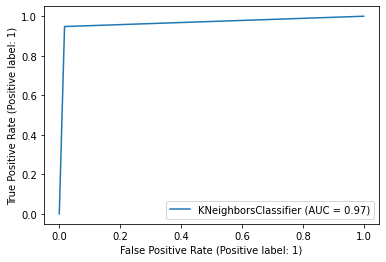

In [161]:
# EXPERIMENTO 2 KNN

clf = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) 
print("---------------Exactitud del modelo para entrenamiento y testeo---------------")
print("Training Accuracy: ",clf.score(X_train, y_train)*100," %")
print("Testing Accuracy: ", clf.score(X_test, y_test)*100," %")
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel() 
print("---------------Desempeño del testeo con KNN---------------")
performance = metricas_perfomance(tn,fp,fn,tp) 
print("Sensibilidad: "+str(performance[1]*100)+" %")
print("Especificidad: "+str(performance[2]*100)+" %")
print("VPN: "+str(performance[3]*100)+" %")
print("VPP: "+str(performance[4]*100)+" %")

plt.figure(figsize=(10,8))
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

Con un k = 1, la exactitud del entrenamiento mejoró, aumentando al 100%. Mientras que la exactitud del testeo disminuyó un 0.5%. Por otro lado, la sensibilidad de testeo se redujo en 3%, disminuyendo su capacidad para diferenciar clases postivas, mientras que la especificidad del testeo aumentó en un 1,2%. 

Respecto al AUC, esta igualmente se redujo en un 0,02%.

Por lo que se puede inferir que la mejora de desempeño en este modelo dependerá de que es lo que se quiere maximizar, porque con un k = 4, la discriminación de clases positiva era superior a 97%, y en esta caso se vio mermada. Sin embargo aumento la especificidad de testeo y exactitud de entrenamiento con un k = 1